In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv files
df=pd.read_csv('Test 1.csv')
df2=pd.read_csv('Test 2.csv')

In [3]:
# Having a look at the data
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


Here we are predicting whether a particular customer was offered a credit card or not. <br>
We are having here demographic factor,country region,estimated bal, balance in account,credit score,risk score etc..<br>

Let us draw some boxplot and get some insights from the data

In [4]:
def boxplot(df,col):
    data_to_plot = [df[df['card_offer']==True][col],df[df['card_offer']==False][col]]
    # Create a figure instance
    fig = plt.figure(figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['True','False'],fontsize=14)
    plt.ylabel(col,fontsize=14)
    plt.show()

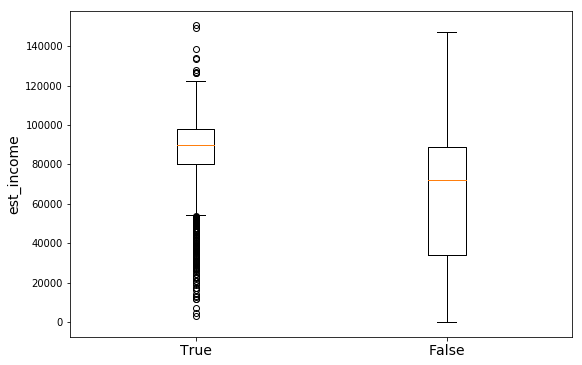

In [5]:
boxplot(df,'est_income')

Hmm..Higher the income more is the chances of acceptance of credit card application

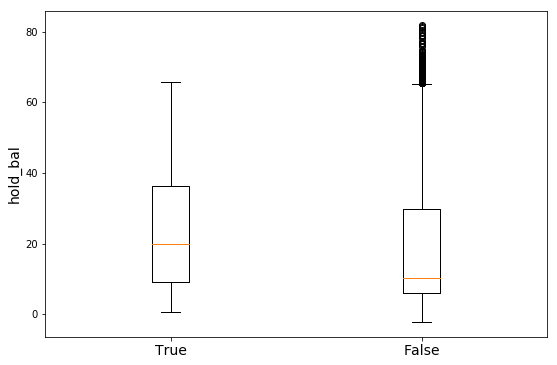

In [6]:
boxplot(df,'hold_bal')

hold_bal i belive it is account balance & it shows here that higher the bal more is the success chance

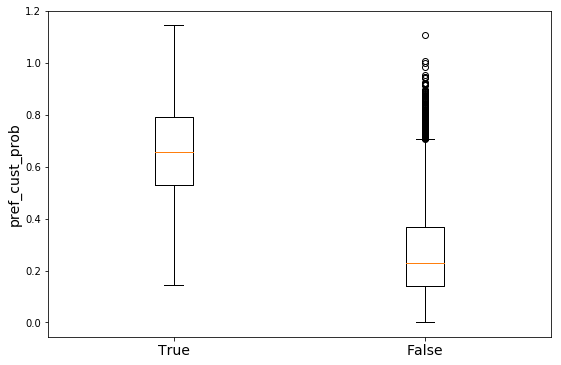

In [7]:
boxplot(df,'pref_cust_prob')

If you are a preferential customer more is your chances of success.Keep good relation with your bank.

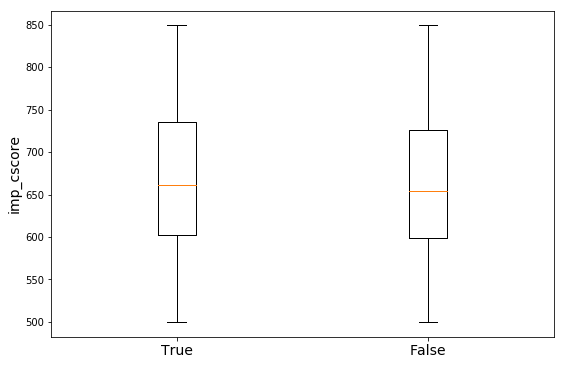

In [8]:
boxplot(df,'imp_cscore')

Just a bit higher in case of True.

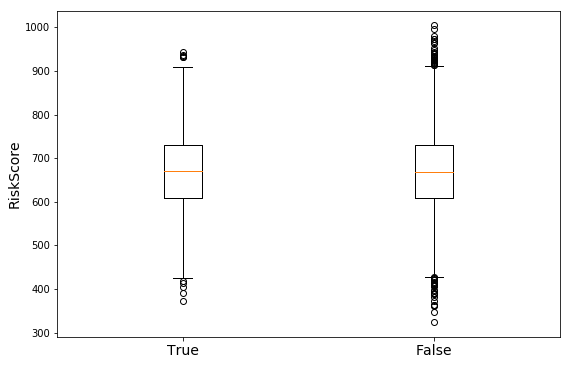

In [9]:
boxplot(df,'RiskScore')

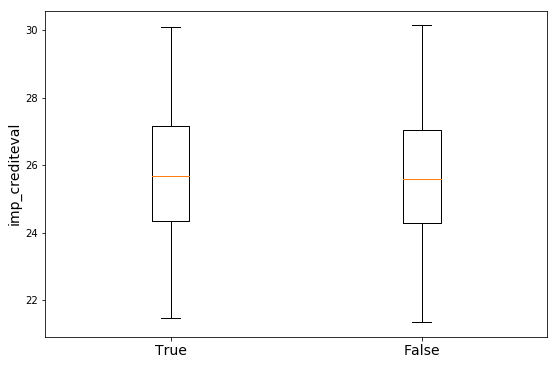

In [10]:
boxplot(df,'imp_crediteval')

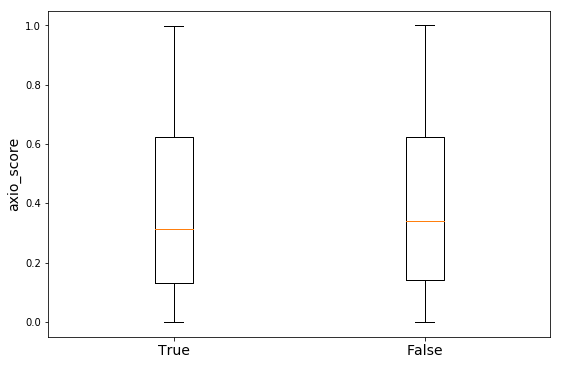

In [11]:
boxplot(df,'axio_score')

Drawing some histograms below:

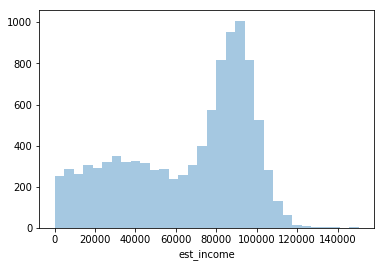

In [12]:
sns.distplot(df['est_income'],kde=False)

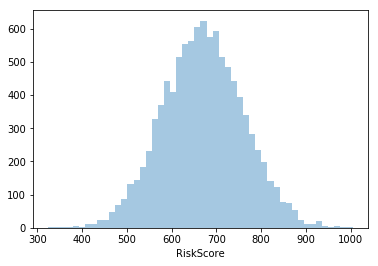

In [13]:
sns.distplot(df['RiskScore'],kde=False)

It's certainly mimics normal distribution .More customer are in the range of 650-750

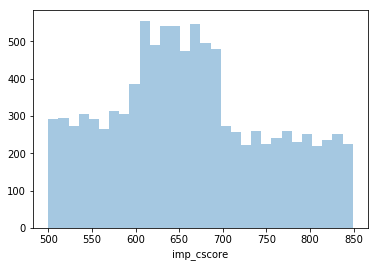

In [14]:
sns.distplot(df['imp_cscore'],kde=False)

Credit score generally for most of people lies between 600-700

Drawing correlation matrix.Checking how features are correlated to each other

In [15]:
# Getting all numerical column in newdf
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf=newdf.drop('customer_id',axis=1)

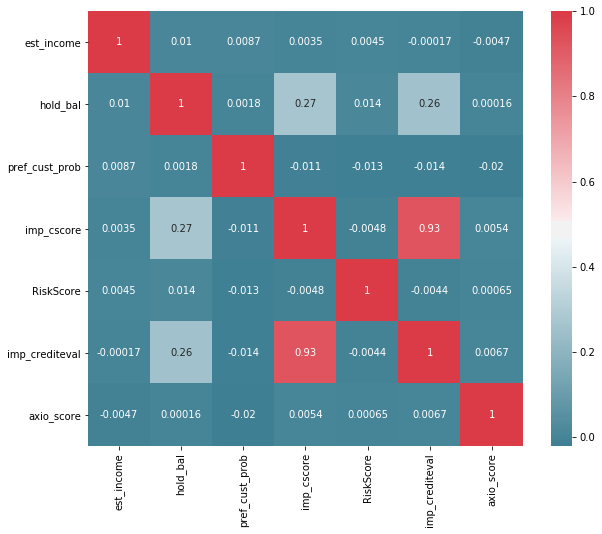

In [16]:
# Drawing correlation matrix.Checking how features are correlated to each other
# plt.matshow(newdf.corr())
corr = newdf.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)



Credit value & Credit score seems to be highly correlated.

In [17]:
card_offered = df.loc[df['card_offer'] == 1]
card_not_offered = df.loc[df['card_offer'] == 0]
print("We have", len(card_offered), "card offered data points and", len(card_not_offered), "card not offered data points.")

We have 1531 card offered data points and 8469 card not offered data points.


In [18]:
# get missing values in datagrame
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

The dataframe has 12 columns.



,Missing Values,% of Total Values
customer_id,0,0.0
demographic_slice,0,0.0
country_reg,0,0.0
ad_exp,0,0.0
est_income,0,0.0
hold_bal,0,0.0
pref_cust_prob,0,0.0
imp_cscore,0,0.0
RiskScore,0,0.0
imp_crediteval,0,0.0


In [20]:
df.shape

(10000, 12)

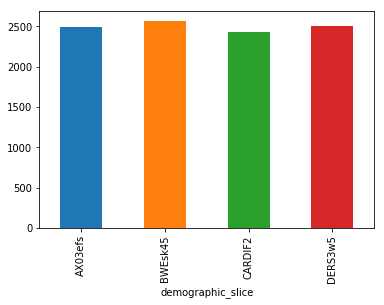

In [21]:
df.groupby("demographic_slice")['customer_id'].count().plot.bar()
plt.show()

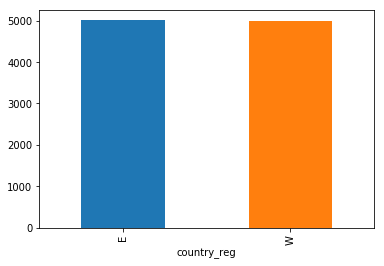

In [22]:
df.groupby("country_reg")['customer_id'].count().plot.bar()
plt.show()

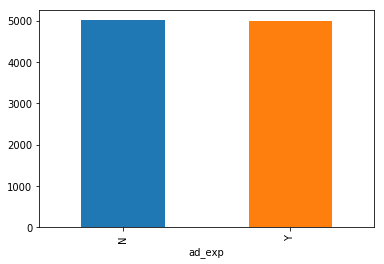

In [23]:
df.groupby("ad_exp")['customer_id'].count().plot.bar()
plt.show()

In [24]:
# Replacing True & False with 1 and 0
df['card_offer'].replace((True, False), (1, 0), inplace=True)

In [25]:
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,0
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,0
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,0
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,0
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,0


In [26]:
# Get one hot encoding of columns demographic_slice
one_hot_demographic_slice = pd.get_dummies(df['demographic_slice'])
# Drop column B as it is now encoded
df = df.drop('demographic_slice',axis = 1)
# Join the encoded df
df = df.join(one_hot_demographic_slice)

# Get one hot encoding of columns country_reg
one_hot_country_reg = pd.get_dummies(df['country_reg'])
# Drop column B as it is now encoded
df = df.drop('country_reg',axis = 1)
# Join the encoded df
df = df.join(one_hot_country_reg)

# Get one hot encoding of columns ad_exp
one_hot_ad_exp = pd.get_dummies(df['ad_exp'])
# Drop column B as it is now encoded
df = df.drop('ad_exp',axis = 1)
# Join the encoded df
df = df.join(one_hot_ad_exp)



In [27]:
# Dropping customer id
df=df.drop('customer_id',axis=1)

In [28]:
# Dropping imp_crediteval 
df=df.drop('imp_crediteval',axis=1)

In [29]:
df_card_offer=df['card_offer']

In [30]:
df=df.drop('card_offer',axis=1)

In [31]:
df = df.join(df_card_offer)

In [32]:
df.head()

,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,axio_score,AX03efs,BWEsk45,CARDIF2,DERS3w5,E,W,N,Y,card_offer
0,33407.901749,3.000000,0.531112,619,503.249027,0.137289,1,0,0,0,0,1,1,0,0
1,19927.533533,20.257927,0.297439,527,820.108146,0.052264,1,0,0,0,1,0,1,0,0
2,51222.470997,4.000000,0.018463,606,586.605795,0.452035,1,0,0,0,0,1,0,1,0
3,67211.587467,18.653631,0.089344,585,634.701982,0.564619,1,0,0,0,1,0,0,1,0
4,20093.342158,4.000000,0.094948,567,631.949979,0.917304,1,0,0,0,0,1,1,0,0


In [33]:
def plot_confusion_matrix(y_test, pred):
    
    y_test_false = y_test.value_counts()[0]
    y_test_true = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_false,1.0/y_test_false],[1.0/y_test_true,1.0/y_test_true]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X = df.iloc[:,:-1]
y = df['card_offer']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of card_offer(True):", len(y.loc[df['card_offer'] == 1]), len(y.loc[df['card_offer'] == 1])/len(y))
print("Number of card_offer(True) on y_test:", len(y_test.loc[df['card_offer'] == 1]), len(y_test.loc[df['card_offer'] == 1]) / len(y_test))
print("Number of card_offer(True) on y_train:", len(y_train.loc[df['card_offer'] == 1]), len(y_train.loc[df['card_offer'] == 1])/len(y_train))

X and y sizes, respectively: 10000 10000
Train and test sizes, respectively: 6500 6500 | 3500 3500
Total number of card_offer(True): 1531 0.1531
Number of card_offer(True) on y_test: 562 0.16057142857142856
Number of card_offer(True) on y_train: 969 0.14907692307692308


# BaseLine Model

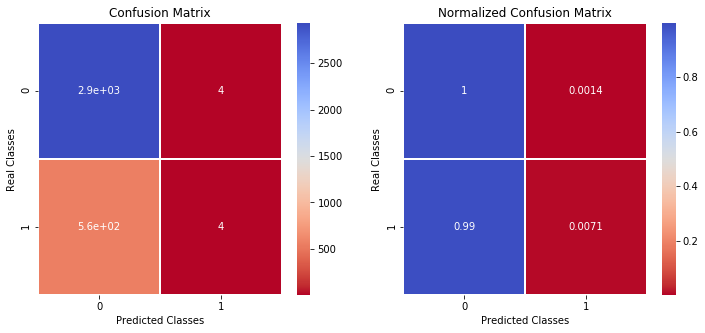

---Classification Report---
             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2938
          1       0.50      0.01      0.01       562

avg / total       0.79      0.84      0.77      3500



In [35]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

AUC-ROC Score: 0.5028779836672004


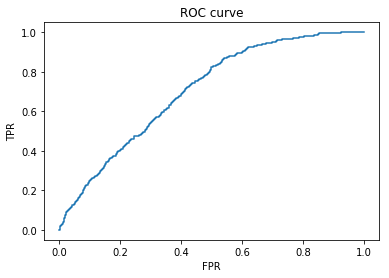

In [36]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Logistic Regression with SMOTE over-sampling:

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
print(X_train.shape)
print(y_train.shape)

(6500, 14)
(6500,)


In [39]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [40]:
print(X_res.shape)
print(y_res.shape)


unique, counts = np.unique(y_res, return_counts=True)
print(np.asarray((unique, counts)).T)

(11062, 14)
(11062,)
[[   0 5531]
 [   1 5531]]


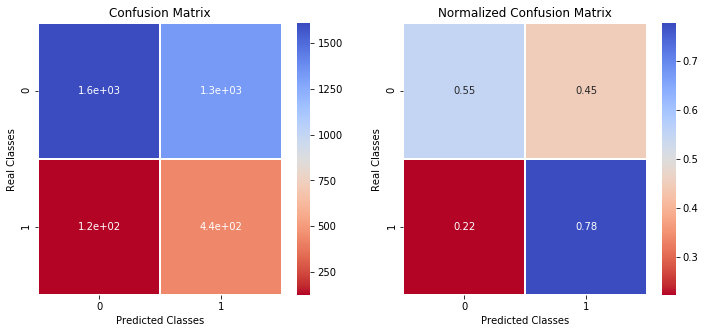

---Classification Report---
             precision    recall  f1-score   support

          0       0.93      0.55      0.69      2938
          1       0.25      0.78      0.38       562

avg / total       0.82      0.58      0.64      3500

Score:  0.5848571428571429


In [41]:
LogReg = LogisticRegression()
LogReg.fit(X_res, y_res)
y_pred = LogReg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

print("Score: ", LogReg.score(X_test, y_test))

AUC-ROC Score: 0.6627859511760246


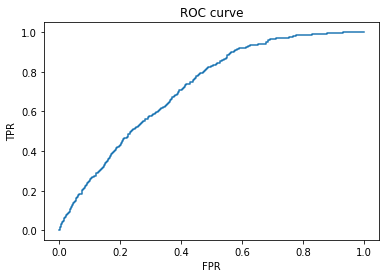

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Decision Tree:

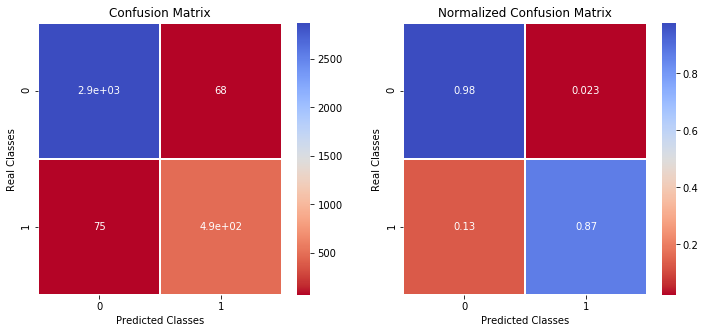

---Classification Report---
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      2938
          1       0.88      0.87      0.87       562

avg / total       0.96      0.96      0.96      3500

AUC-ROC Score: 0.9217015230541511


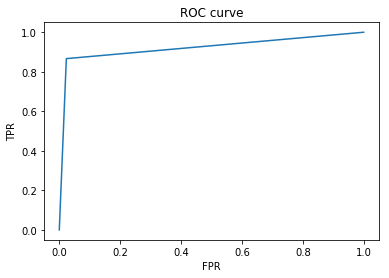

In [43]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
y_pred = model.predict(X_test) 

plot_confusion_matrix(y_test, y_pred)

print("AUC-ROC Score:",roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
# print(classification_report(y_test, y_pred))

# Random Forest

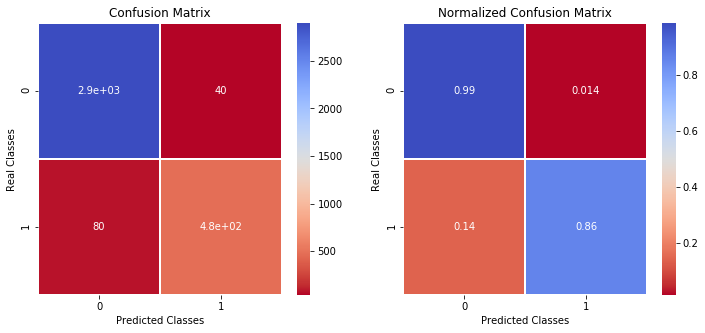

---Classification Report---
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2938
          1       0.92      0.86      0.89       562

avg / total       0.97      0.97      0.97      3500

AUC-ROC Score: 0.984130815016873


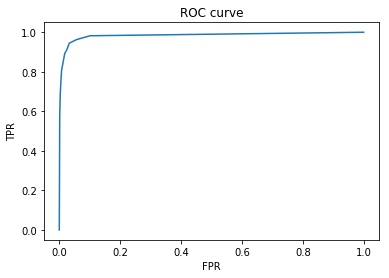

[[2898   40]
 [  80  482]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2938
          1       0.92      0.86      0.89       562

avg / total       0.97      0.97      0.97      3500



In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
y_pred_series=pd.Series(y_pred.round().astype(int))
plot_confusion_matrix(y_test, y_pred_series)

print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

confusion_matrix = confusion_matrix(y_test, y_pred_series)
print(confusion_matrix)
print(classification_report(y_test, y_pred_series))

# Predicting on  test 2 data

In [45]:
# Get one hot encoding of columns demographic_slice
one_hot_demographic_slice = pd.get_dummies(df2['demographic_slice'])
# Drop column B as it is now encoded
df2_demographic_slice=df2['demographic_slice']
df2 = df2.drop('demographic_slice',axis = 1)
# Join the encoded df2
df2 = df2.join(one_hot_demographic_slice)

# Get one hot encoding of columns country_reg
one_hot_country_reg = pd.get_dummies(df2['country_reg'])
# Drop column country_reg as it is now encoded
df2_country_reg=df2['country_reg']
df2 = df2.drop('country_reg',axis = 1)
# Join the encoded df2
df2 = df2.join(one_hot_country_reg)

# Get one hot encoding of columns ad_exp
one_hot_ad_exp = pd.get_dummies(df2['ad_exp'])
# Drop column ad_exp as it is now encoded
df2_ad_exp=df2['ad_exp']
df2 = df2.drop('ad_exp',axis = 1)
# Join the encoded df2
df2 = df2.join(one_hot_ad_exp)

df2_customer_id=df2['customer_id']
df2=df2.drop('customer_id',axis=1)

In [46]:
df2=df2.drop('card_offer',axis=1)

In [47]:
df2_imp_crediteval=df2['imp_crediteval']
df2=df2.drop('imp_crediteval',axis=1)

In [48]:
df2.head()

,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,axio_score,AX03efs,BWEsk45,CARDIF2,DERS3w5,E,W,N,Y
0,26323.092375,3.000000,0.461364,603,505.509062,0.351222,1,0,0,0,0,1,1,0
1,67374.621654,17.861095,0.473517,650,466.158076,0.080106,1,0,0,0,1,0,0,1
2,1728.369713,21.604489,0.486220,606,603.346280,0.208180,1,0,0,0,1,0,1,0
3,15814.210261,22.058403,0.462249,530,747.158221,0.080122,1,0,0,0,1,0,0,1
4,45233.588193,1.000000,0.541660,640,704.781194,0.667270,1,0,0,0,0,1,0,1


In [49]:

X_train = df.iloc[:,:-1]
y_train = df['card_offer']
print(X_train.shape)

X_test = df2
print(X_test.shape)
# y_test = df2['card_offer']

print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test))
print("Total number of card_offer(True):", len(y.loc[df['card_offer'] == 1]), len(y.loc[df['card_offer'] == 1])/len(y))
print("Number of card_offer(True) on y_test:", len(y_test.loc[df['card_offer'] == 1]), len(y_test.loc[df['card_offer'] == 1]) / len(y_test))
print("Number of card_offer(True) on y_train:", len(y_train.loc[df['card_offer'] == 1]), len(y_train.loc[df['card_offer'] == 1])/len(y_train))

(10000, 14)
(10000, 14)
Train and test sizes, respectively: 10000 10000 | 10000
Total number of card_offer(True): 1531 0.1531
Number of card_offer(True) on y_test: 562 0.16057142857142856
Number of card_offer(True) on y_train: 1531 0.1531


In [50]:
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)
y_pred=pd.Series(y_pred.round().astype(int))

In [51]:
# model = tree.DecisionTreeClassifier()
# model.fit(X_train, y_train)
# predictions = model.predict_proba(X_test)
# y_pred = model.predict(X_test) 

In [52]:
# y_pred

In [53]:
card_offer=pd.Series(y_pred)

In [54]:
# Putting series into dataframe
cc=card_offer.to_frame(name='card_offer')

In [55]:
# cc

In [56]:
df3 = df2.join(cc['card_offer'])

In [57]:
df3=df3.join(df2_demographic_slice)
df3=df3.join(df2_country_reg)
df3=df3.join(df2_ad_exp)
df3=df3.join(df2_imp_crediteval)
df3=df3.join(df2_customer_id)

In [58]:
df3.head()

,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,axio_score,AX03efs,BWEsk45,CARDIF2,DERS3w5,E,W,N,Y,card_offer,demographic_slice,country_reg,ad_exp,imp_crediteval,customer_id
0,26323.092375,3.000000,0.461364,603,505.509062,0.351222,1,0,0,0,0,1,1,0,0,AX03efs,W,N,23.806688,596723
1,67374.621654,17.861095,0.473517,650,466.158076,0.080106,1,0,0,0,1,0,0,1,0,AX03efs,E,Y,26.068803,841834
2,1728.369713,21.604489,0.486220,606,603.346280,0.208180,1,0,0,0,1,0,1,0,0,AX03efs,E,N,23.628955,402401
3,15814.210261,22.058403,0.462249,530,747.158221,0.080122,1,0,0,0,1,0,0,1,0,AX03efs,E,Y,22.533957,734431
4,45233.588193,1.000000,0.541660,640,704.781194,0.667270,1,0,0,0,0,1,0,1,0,AX03efs,W,Y,24.298782,739547


In [59]:
df3.card_offer.value_counts()

0    8577
1    1423
Name: card_offer, dtype: int64

In [60]:
df4=df3[['customer_id','demographic_slice','country_reg','ad_exp','est_income','hold_bal','pref_cust_prob','imp_cscore','RiskScore','imp_crediteval','axio_score','card_offer']]

In [61]:
df4.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,0
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,0
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,0
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,0
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,0


In [62]:
# Replacing 1 and 0 with True & False
df4['card_offer'].replace((1, 0), (True, False), inplace=True)

In [63]:
df4.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,False
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,False
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,False
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,False
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,False


In [64]:
# Output the prediction
df4.to_csv("out1.csv", index=False)